In [132]:
# import dataframe packages
import pandas as pd
import numpy as np

# import visualization packages
import matplotlib.pyplot as plt
import seaborn as sb

In [97]:
shoes_df = pd.read_csv('/Users/anjawu/Code/shopify-intern-project/DS-InternChallenge_DataSet.csv')
shoes_df.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


### Checking that the data only contains one months worth (2017-03)
As the AOV is to be calculated looking at orders data over a 30 day window, I wanted to check that it was indeed 30 days.

In [231]:
shoes_df['created_at'] = pd.to_datetime(shoes_df.created_at)
shoes_df['date'] = shoes_df['created_at'].dt.date

# Checking to ensure that there is just one month of data:
shoes_df['date'].sort_values()

1143    2017-03-01
1610    2017-03-01
1608    2017-03-01
3146    2017-03-01
3152    2017-03-01
           ...    
842     2017-03-30
3988    2017-03-30
882     2017-03-30
954     2017-03-30
3643    2017-03-30
Name: date, Length: 5000, dtype: object

--- The date range is for March of 2017 ---

----

### On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of 3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

# Part A)
### Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

In [207]:
shoes_df['order_amount'].mean()
# Calculated by taking the total of each order and dividing it by the number of orders

3145.128

In [101]:
# Re-create how they calculated AOV, to be sure:
sum(shoes_df['order_amount'])/len(shoes_df.index)

3145.128

**The AOV calculation doesn't take into account any outliers, where there might be a large amount of shoes purchased in one order. So we can check the distribution of the data:**

## Distribution of data:
### Analyzing total_items outliers

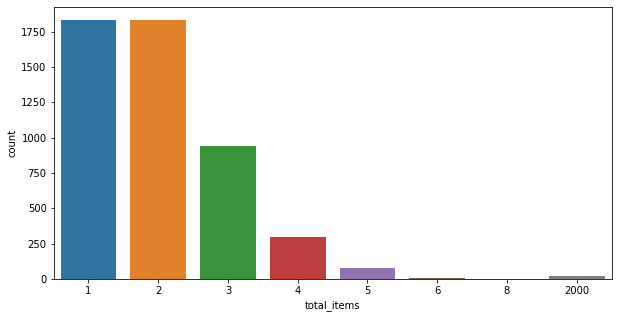

In [122]:
plt.figure(figsize = (10,5))
sb.countplot(x='total_items', data=shoes_df);

***Immediately we can see that there are some orders that contained 2000 items, the next biggest is 8.***

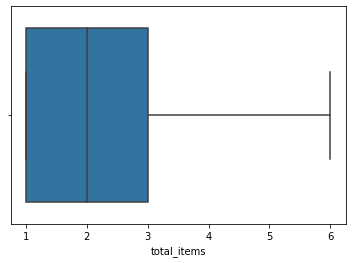

In [233]:
# showfliers = False removes outliers from view to be more readily able to see box-and-whisker plot values as 2,000 is far from 6
sb.boxplot(x = 'total_items', data = shoes_df, showfliers = False);

--- As can be seen from the box-and-whisker plot any total_item over 6 is considered an outlier (using 1.5IQR). ---

In [167]:
# As 8 is only slightly higher than 6 for total_items and in the bar chart it seems like a small value, 
# I was curious how many orders the total_item = 8 had
shoes_df[shoes_df['total_items']==8]['order_amount'].count()

1

***We can see that above 6 are considered a outliers, so it would be a good idea to analyze AOV without the 2000 total_items and since there is only 1 order of 8 items, it does not need to be removed as it will not affect the dataset much.*** 

## Removal of total_orders = 2000:

In [237]:
shoes_df[shoes_df['total_items']==2000].shape

(17, 8)

**We will be removing 17 of them, leaving 4983 orders left.**

In [182]:
smaller_2000_shoes_df = shoes_df.copy()
smaller_2000_shoes_df = smaller_2000_shoes_df.drop(index=smaller_2000_shoes_df[smaller_2000_shoes_df['total_items']==2000].index)
smaller_2000_shoes_df


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,date
0,1,53,746,224,2,cash,2017-03-13 12:36:56,2017-03-13
1,2,92,925,90,1,cash,2017-03-03 17:38:52,2017-03-03
2,3,44,861,144,1,cash,2017-03-14 04:23:56,2017-03-14
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,2017-03-26
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11,2017-03-01
...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,2017-03-30
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,2017-03-16
4997,4998,56,867,351,3,cash,2017-03-19 05:42:42,2017-03-19
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,2017-03-16


--- Now that we have dealt with the outliers of the total_items, we can checkout order_amount --- 

### Analyzing order_amount outliers:

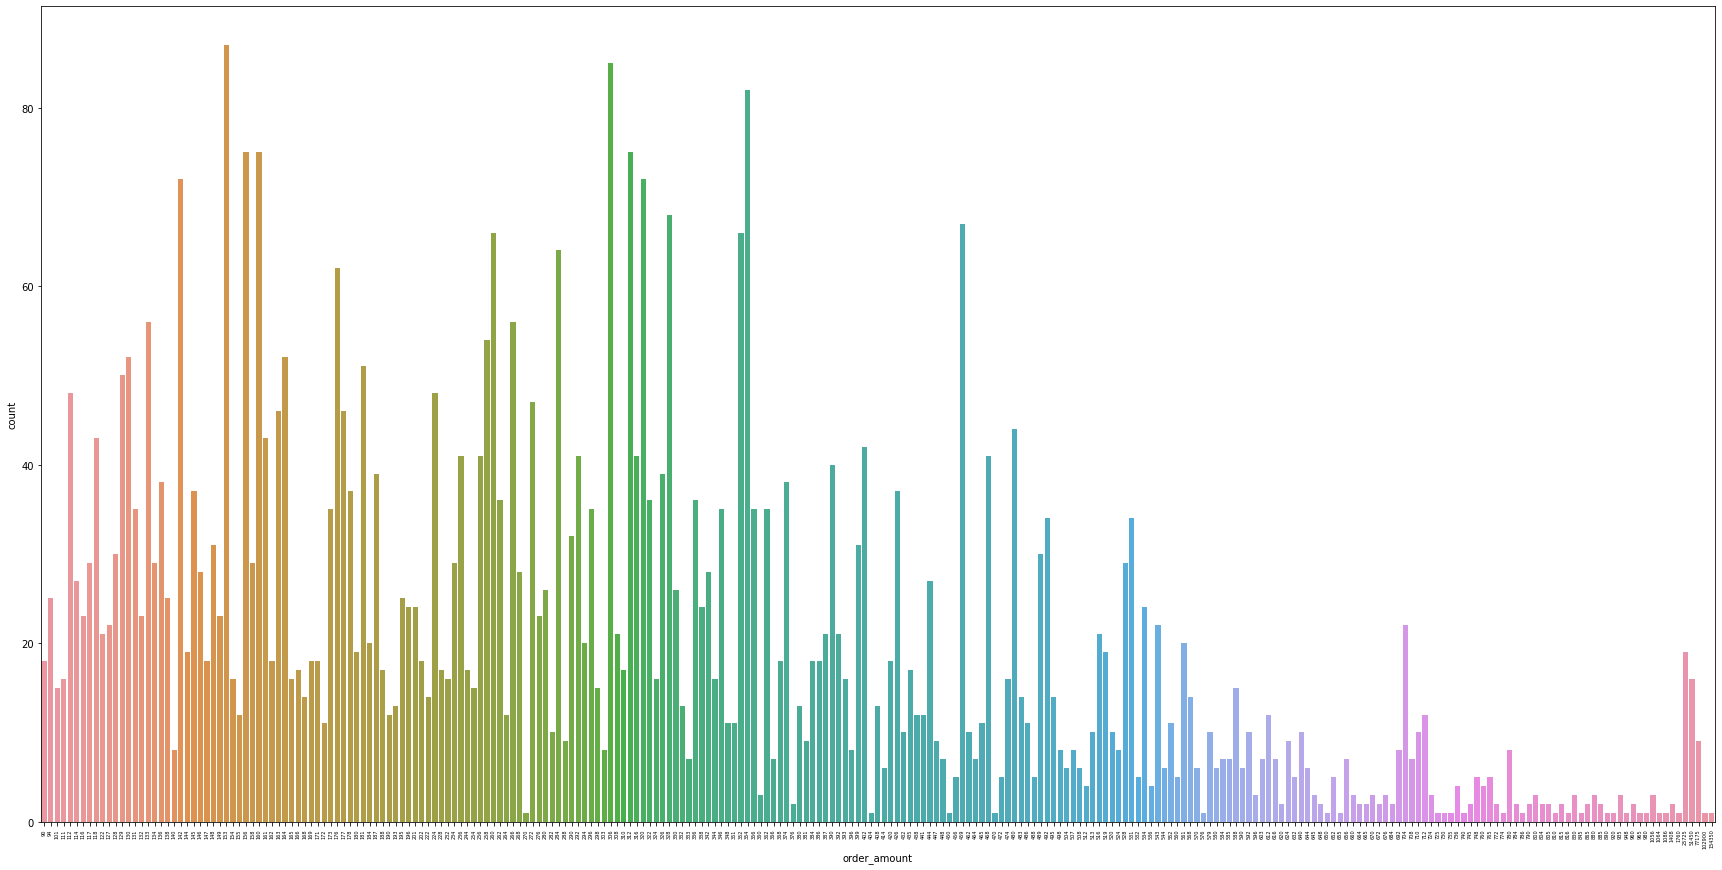

In [234]:
plt.figure(figsize = (30,15))
sb.countplot(x='order_amount', data=smaller_2000_shoes_df)
plt.xticks(rotation='vertical', fontsize= 5)
plt.show
# plt.savefig('/Users/anjawu/Code/shopify-intern-project/order-amount-countplot.png',  facecolor = 'white')


I know that you cannot see the numbers but I'm plotting the histogram to get a big picture idea of the data spread for order_amount. As can be seen (even with the removal of total_items = 2,000) there are several orders that have a very large order_amount (more than 3 digits). This creates an unexpected spike at the expensive end of the graph, which is interesting and should be dug into more. So to get a more granular view, we analyze a box-and-whisker plot.

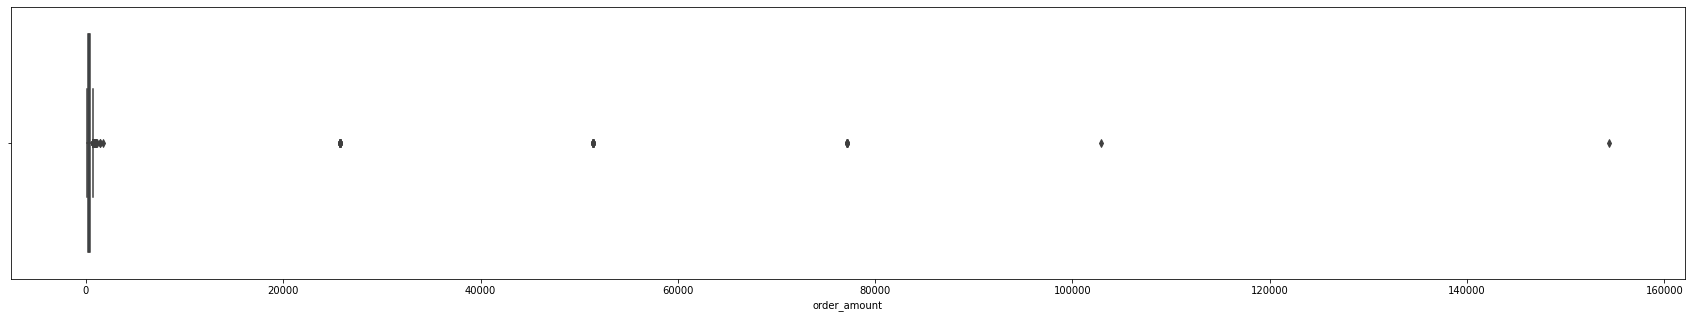

In [168]:
plt.figure(figsize = (30,5))
sb.boxplot(x = 'order_amount', data = smaller_2000_shoes_df);

--- Here we see that there are still dollar amounts over 20,000. We can find the value of 1.5 IQR for outliers: ---

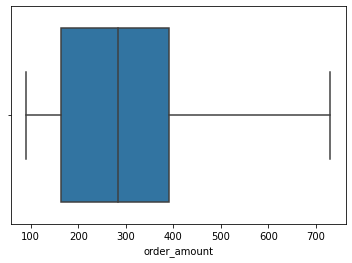

In [103]:
sb.boxplot(x = 'order_amount', data = shoes_df, showfliers = False);

--- As can be seen from the box-and-whisker plot any order_amount over 725 is considered an outlier. ---

Let's checkout the dataset for order_amount over 725:

In [227]:
order_amount_over_725 = smaller_2000_shoes_df[smaller_2000_shoes_df['order_amount']>725]

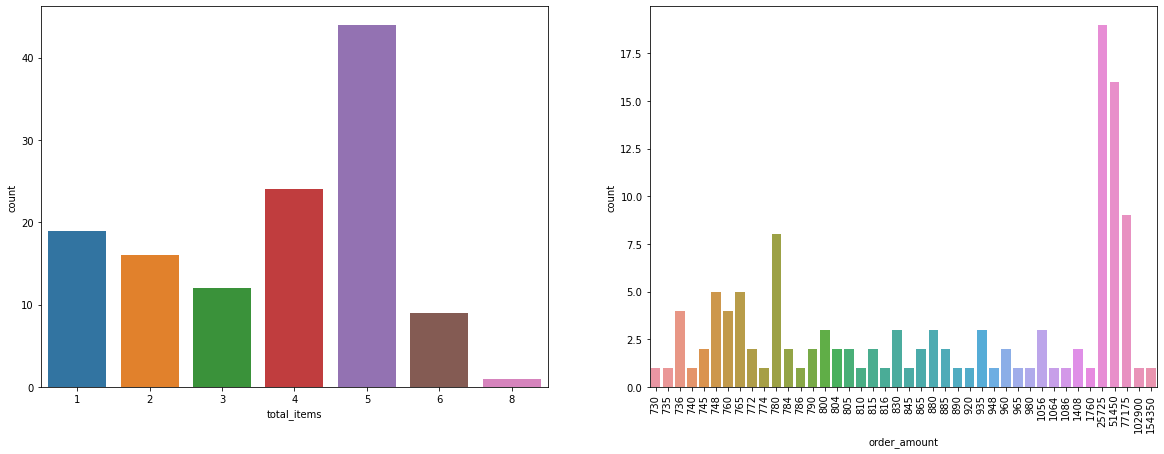

In [228]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (20,7))
sb.countplot(x='total_items', data=order_amount_over_725, ax=ax0);
sb.countplot(x='order_amount', data=order_amount_over_725, ax=ax1);
plt.xticks(rotation = 'vertical');

The order_amount jump goes from 1,760 to 25,725 - which is a very larger jump. Out of curiousity, I looked into how many items were sold for that amount:

In [206]:
shoes_df[shoes_df['order_amount'] == 25725]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,date
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:57,2017-03-12
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,2017-03-15
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,2017-03-16
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,2017-03-17
1384,1385,78,867,25725,1,cash,2017-03-17 16:38:06,2017-03-17
1419,1420,78,912,25725,1,cash,2017-03-30 12:23:43,2017-03-30
1452,1453,78,812,25725,1,credit_card,2017-03-17 18:09:54,2017-03-17
2270,2271,78,855,25725,1,credit_card,2017-03-14 23:58:22,2017-03-14
2548,2549,78,861,25725,1,cash,2017-03-17 19:36:00,2017-03-17
2773,2774,78,890,25725,1,cash,2017-03-26 10:36:43,2017-03-26


--- This shows that one store is selling one item for $25,725. This seems very high and unusual for most shoe stores and it takes information away from the AOV. ---

Checking to see number of total_items distribution for all order_amounts over $25,000:

In [204]:
order_amount_over_25000 = smaller_2000_shoes_df[smaller_2000_shoes_df['order_amount']>25000]

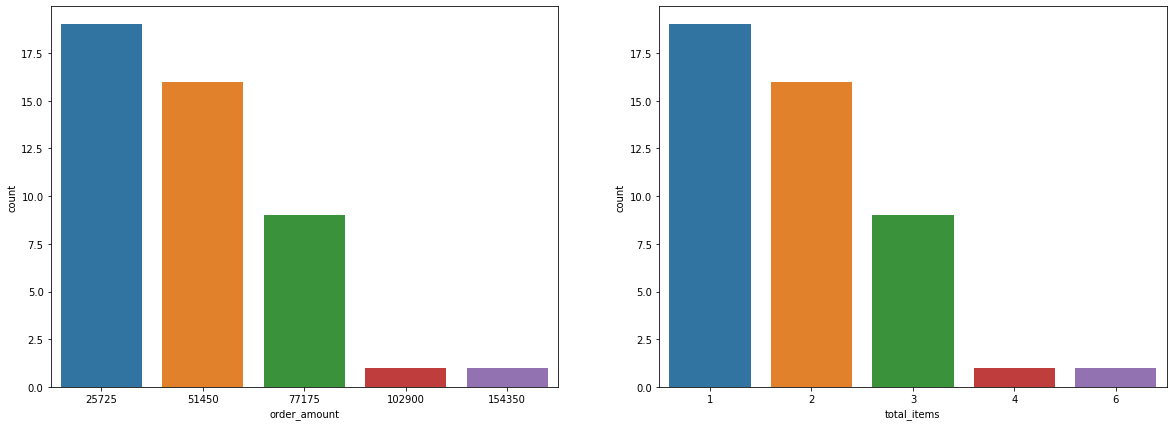

In [205]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (20,7))
sb.countplot(x='order_amount', data=order_amount_over_25000, ax=ax0);
sb.countplot(x='total_items', data=order_amount_over_25000, ax=ax1);

--- As can be seen most of these large order_amounts are majority for only a few items (1-3) ---

These order amounts are very high, especially considering the number of total_items per order. Although anything over 725 is considered an outlier based on our box-and-whisker plot, I wanted to keep as much data as possible to give more information. I decided to take out order_amounts over 25,000 because the jump prior to that amount is under 2,000. This seems like a reasonable cap.

In [236]:
smaller_2000_shoes_df[smaller_2000_shoes_df['order_amount']>25000].shape

(46, 8)

**We will be removing 46 more orders, leaving 4937 orders left.**

### Creating Final DataFrame after removing outliers

In [191]:
# Creating new dataframe to store the shoes stores which have their cost under 25,000 (including dropping the total_items = 2000)
cost_under_25000_shoes_df = smaller_2000_shoes_df.copy()
cost_under_25000_shoes_df = cost_under_25000_shoes_df.drop(index=cost_under_25000_shoes_df[cost_under_25000_shoes_df['order_amount']>25000].index)
cost_under_25000_shoes_df


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,date
0,1,53,746,224,2,cash,2017-03-13 12:36:56,2017-03-13
1,2,92,925,90,1,cash,2017-03-03 17:38:52,2017-03-03
2,3,44,861,144,1,cash,2017-03-14 04:23:56,2017-03-14
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,2017-03-26
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11,2017-03-01
...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,2017-03-30
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,2017-03-16
4997,4998,56,867,351,3,cash,2017-03-19 05:42:42,2017-03-19
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,2017-03-16


<function matplotlib.pyplot.show(close=None, block=None)>

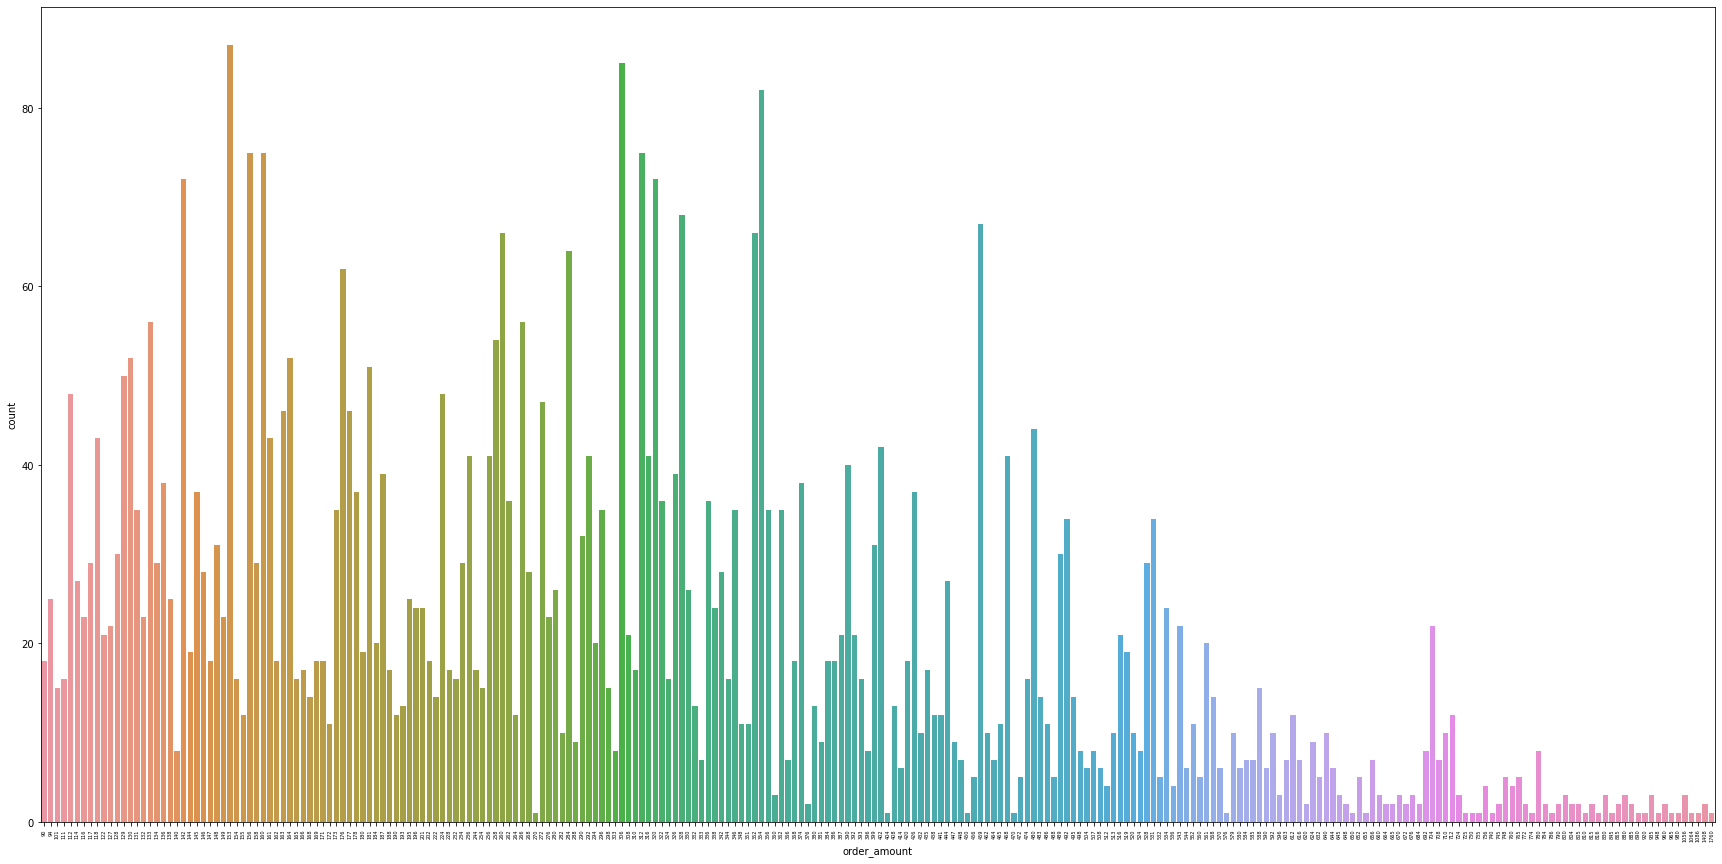

In [193]:
plt.figure(figsize = (30,15))
sb.countplot(x='order_amount', data = cost_under_25000_shoes_df)
plt.xticks(rotation='vertical', fontsize= 5)
plt.show

This distribution seems a lot more of what should be expected (more of a plateau at the more expensive end - rather than a spike compared to before).

### Summary of Part a):

The AOV was calculated correctly: sum of order_amount divided by sum of total_items. However, the reason the AOV is so high ($3,145.13) is because there are outliers for both total_items and order_amount. Calculating mean with outliers heavily influencing the average.

As can be seen in the Jupyter notebook, for total_items any item amount over 6 is considered an outlier. We can see that there are 17 orders in which the total_items was 2,000, there was also one order that had 8 total_items. The one order with 8 items will not affect the data much, as it is very close to the other total_items, so it was kept in the data, while the orders with total_items of 2000 was removed. 

For the order_amount, when we look at the distribution we can see that there is a large jump from just under 2,000 to above 25,000 (this only includes total_items mostly for 1-3). This seems to be might be some sort of error in inputting as 25,725 for 1 pair of shoes is strange. If I were working on this and had access to the pipeline or could speak to he process of collecting data, I would dig into the mentioned outliers to see if they are legitimate or if they were mistakes made. So I removed dollar amounts above 25,000 - this was 46 more points (out of the remaining 4983), leaving 4937 orders.

Now using the three differently adjusted datasets, we can analyze between: mean, median and mode for the AOV.



*Note: this is also found in the PDF document but was put here for ease of reading and not flipping between pages*

--- 

# Part B)
### What metric would you report for this dataset?

Looking at mean, median, and mode for all three steps (1- no removal of data, 2- removal of total_items = 2,000, 3- removal of order_amount > 25,000).

### Mean:

In [195]:
shoes_df['order_amount'].mean()

3145.128

In [183]:
smaller_2000_shoes_df['order_amount'].mean()

754.0919125025085

In [192]:
cost_under_25000_shoes_df['order_amount'].mean()

302.58051448247926

### Median:
This should not change, but put the calculations for completion sake.

In [198]:
shoes_df['order_amount'].median()

284.0

In [196]:
smaller_2000_shoes_df['order_amount'].median()

284.0

In [197]:
cost_under_25000_shoes_df['order_amount'].median()

284.0

### Mode
This should not change, but put the calculations for completion sake.

In [199]:
shoes_df['order_amount'].mode()

0    153
dtype: int64

In [200]:
smaller_2000_shoes_df['order_amount'].mode()

0    153
dtype: int64

In [201]:
cost_under_25000_shoes_df['order_amount'].mode()

0    153
dtype: int64

### Summary of Part b):

The metrics to choose from are mean, median, and mode for AOV. Traditionally, AOV uses the arithmetic mean (https://www.bigcommerce.com/ecommerce-answers/what-average-order-value/). Through a source (https://www.shopify.ca/blog/average-order-value) I have found it is important to consider all 3 metrics when looking at improving e-commerce conversions. The mean was calculated with 3 different datasets; first looked at no data points removed (mean of 3145.13) , second remove the 17 cases of total_items in order being 2,000 (mean of $754.09), and third on top of the total orders of 2000 there were also orders which had only several items that were valued at over 25,000. This last case seemed like some error, so these were removed.  In this last case, we can see the adjusted mean (when outliers are removed both for high total_items and high order_amount) is: 302.58, whereas the median is 284.0 and the mode is 153. All of these give different facts about what it means for the shoe sales. The mean will give you the classic average of sales, but it is more easily swayed by extremes. The median will give you the middle value of orders, which is better for skewed data. As two of the metrics  are close together it would be reasonable to take the classic AOV definition of 302.58. One good point of several articles read was that if the point of the AOV is to figure out a price point for free shipping it would be a good idea to go with the mode for the company on its own to increase the more frequently bought items. However, since this is not about any one specific store but rather 100 shoes stores run through Shopify, I would use the adjusted mean for the calculation of AOV.

*Note: this is also found in the PDF document but was put here for ease of reading and not flipping between pages*

### Conclusion (Part C)

Given the fact that we are looking at multiple shoe stores (not just one), the mean and median are close, and the final dataset removed the data that <u>seems</u> (with the information given) unreasonable: the adjusted mean of 302.58 should be used for AOV.